# ⚠️ EDIT "OPEN IN COLAB" BADGE PRIOR TO DOING ASSIGNMENT

<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_3.7.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 3.7
# Benjamin Herrera
# 10 NOV 2024

# ⚠️ Run these commands prior to running anything

In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install torch

In [2]:
!pip install Pillow

## 🤖📈📖 Neural Networks

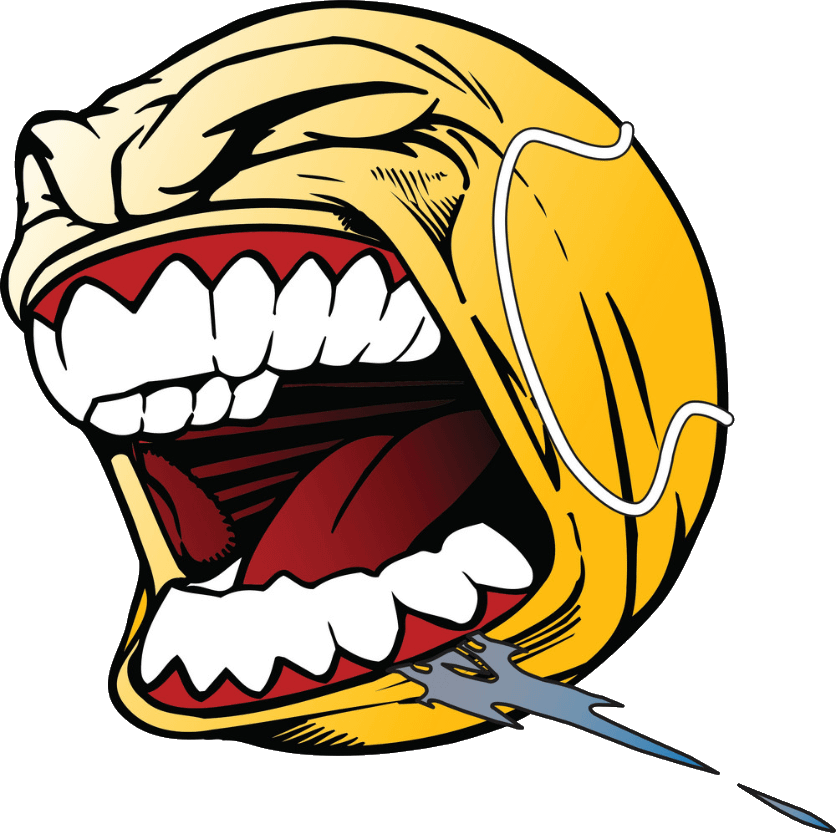

In [3]:
from IPython.display import display
from PIL import Image
import requests
URL = "https://preview.redd.it/2d-kinda-looks-like-lets-fucking-go-ball-in-this-art-v0-e9fpp4b3s8rb1.png?width=836&format=png&auto=webp&s=be289e233f3ab13aa6a738dfe516b9bd6aec25ad"
image = Image.open(requests.get(URL, stream=True).raw)
display(image)

In [4]:
from IPython.display import HTML
display(HTML(f'<img src=https://media4.giphy.com/media/LljUmfyqQQrWsVXZyY/200w.gif?cid=6c09b952vj7qapwbx7uhay4kjpdsv2fxr9zvphzr36kekbo4&ep=v1_gifs_search&rid=200w.gif&ct=g />'))

### LETS GOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO000000OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

We are now in the coveted chapter: **Neural Networks**. The most hyped up, overrated, oversaturated topic in Computer Science. The bread and butter of LLMs, planning agents, geofoundational models, and so much more! Neural Networks are the water to ships owned by ChatGPT, ClaudeAI, and GPT Zero. 

Ok, enough glazing. In all seriousness, neural networks utilize almost all of the concepts we have been going through in this class. From HW 1.2 to HW 3.7, we will use these topics to go through how Neural Networks generalize to the data they are trained on. 

The first concept to understand is the perceptron. This is essentially a simple linear function that weights every outputs (activations), sums it, sends it to an activation function, and adds a bias to the activation function output. In essence, the function looks like this:

$$a_{[l, j]} = g_{[l]}(W_{[i, j]} x_{[i]} + b_{[l,j]})$$

where, $l$ is the layer number, $j$ is the jth neuron in the layer, $g$ is the activation function, $W$ is the weight matrix, $x$ is the activation input vector, and $b$ is the bias value for the jth neuron in the layer. This is just for one neuron, we can stake multiple neurons in one layer and have multiple layers. So if we want to stack that, it can look like this

$$\hat{y} = g_{[3]}(W_{[3]}[g_{[2]}(W_{[2]}[g_{[1]}(W_{[1]}x_i + b_1)] + b_2 )] + b_3)$$

where $\hat{y}$ is the output of the entire neural network. In the above example, we can see a three layer neural network with any variable layer size. The main part about this is the $W$. Those are weights. There are also known as parameters and coefficients. These are the learnable aspect of neural networks and can be updated during back propagation (which we will go through later).

Another aspect of this are the activation functions $g$ that creates non-linearity during inferencing. In other words, for the model to be able to perform generally based on the giving data, the activations must be non-linear. So what activations are there? Let's start with the sigmoid function. In fact we gone over this with the logistic regression chapter in HW 3.4. To recap, the sigmoid function looks like this: 

$$g(x) = \frac{1}{1+e^{-x}}$$

When graphed, it looks like this:

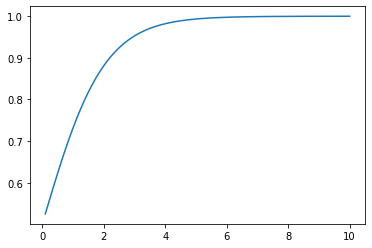

In [5]:
# Import 
import matplotlib.pyplot as plt
import numpy as np

# Get values for a sigmoidd function
x = np.linspace(0.1, 10, 400) 
y_sigmoid = (lambda x: 1 / (1 + np.exp(-x)))(x)

# Plot a sigmoid function
plt.figure()
plt.plot(x, y_sigmoid)
plt.show()

However, as explained in HW 3.4, this only works well with binary values. Like many real world tasks, not everything is black and white. It is very mostly gray. So, how do get an activation function that tends to a continuous value of other outputs? We can! And it is with the ReLU function (**Re**ctified **L**inear **U**nit Function). The ReLU function looks something like this:

$$g(x) = \max(0, x)$$

Graphed, it looks like this:

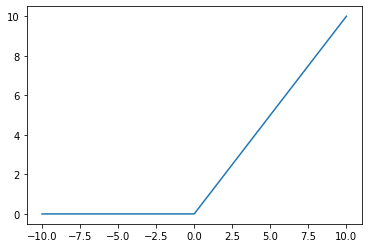

In [6]:
# Plot the ReLU function
x = np.linspace(-10, 10, 400) 
y_relu = (lambda x: np.maximum(0, x))(x)

# Plot a sigmoid function
plt.figure()
plt.plot(x, y_relu)
plt.show()

There are also other activations like $\tanh(x)$, $\textrm{SiLU}(x)$, and $\textrm{GeLU}(x)$. To get a list of different activations (with `PyTorch`), check the list of different activations below:

In [7]:
import torch.nn.functional
dir(torch.nn.functional)

['BroadcastingList1',
 'BroadcastingList2',
 'BroadcastingList3',
 'Callable',
 'DType',
 'GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 'Optional',
 'TYPE_CHECKING',
 'Tensor',
 'Tuple',
 'Union',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_canonical_mask',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_in_projection',
 '_in_projection_packed',
 '_infer_size',
 '_is_integer',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_mha_shape_check',
 '_no_grad_embedding_renorm_',
 '_none_or_dtype',
 '_overload',
 '_pair',
 '_single',
 '_sym_int',
 '_threshold',
 '_triple',
 '_unpool_output_size',
 '_verify_batch_size',
 '_verify_spatial_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_m

There are some other functions here that are not activations functions, but this part of the library has them.

Like I have said before, there is a need to figure out how the model is doing. This is via a loss function. This function can be a multitude of different things. For example we can have a to get the Mean Squared Root Error (RMSE). The formula looks like this below:

$$\textrm{RMSE} = \sqrt{\sum_{i=1}^n \frac{(\hat{y_i} - y_i)}{n}}$$

where $\hat{y_i}$ is the model's prediction and $y_i$ is the ground truth value. $n$ is the number of samples in the evaluation step. Another is the cross entropy loss where it is used for classification tasks like NLP generation or object prediction in image segmentation. Below is the formula for cross-entropy

$$\textrm{H}(p, q) = -\sum_{x \isin X} p(x) \log(q(x))$$

where $p$ is the model's distribution and $q$ is the ground truth distribution. This is more for discrete types of classes.

You can get a list of loss functions with the `torch.nn.functional` library. Above you can find classes with the key term `loss` and it will indicated that they are loss functions.

Now, when we say that we inference a model, it essentially means that we are feeding the model a set of samples and get the model's output $\hat{y_i}$. This can then be used to get the model's output performance via the loss function that you use. However, how does the model learn? Well, we use the value from the loss function to update the weights. How can we do that? We can use a back propagation algorithm! Using the gradients concept in HW 3.2 and 3.3, we can update the weights $W_x$ in the model via some algorithm. The most famous of which is the `Adam` optimizer. To get a list of various optimization functions, we can use the `torch.optim` portion of the `PyTorch` library

In [8]:
import torch.optim
dir(torch.optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

Now that we've laid out the simple concepts of Neural Network, let's go and make a simple neural network that trains over some random sample of data!

In [15]:
# Imports
from torch.utils.data import Dataset


# Dataset definition
class TheDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.x = torch.linspace(-10, 10, num_samples).view(-1, 1)
        self.y = 3 * self.x + 4 + torch.randn(self.x.size()) * 0.7

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [16]:
# Imports
import torch.nn as nn


# Model definition
class TheModel(nn.Module):
    def __init__(self):
        super(TheModel, self).__init__()
        self.linear1 = nn.Linear(1, 512)
        self.relu = torch.nn.ReLU()
        self.linear2 = nn.Linear(512, 1)

    def forward(self, x):
        y = self.linear1(x)
        y = self.relu(y)
        y = self.linear2(y)
        y = self.relu(y)
        return y

In [17]:
# Imports
import torch
from torch.utils.data import DataLoader

# Build components prior to training
dataset = TheDataset()
dataloader = DataLoader(dataset, batch_size=10)
model = TheModel()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [18]:
# Train the model
for epoch in range(100):
    for x, y in dataloader:
        model.train()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1}/100 >> LOSS: {loss.item():.2f}")

Epoch: 1/100 >> LOSS: 4.71
Epoch: 2/100 >> LOSS: 0.71
Epoch: 3/100 >> LOSS: 0.41
Epoch: 4/100 >> LOSS: 0.31
Epoch: 5/100 >> LOSS: 0.35
Epoch: 6/100 >> LOSS: 0.47
Epoch: 7/100 >> LOSS: 0.53
Epoch: 8/100 >> LOSS: 0.56
Epoch: 9/100 >> LOSS: 0.61
Epoch: 10/100 >> LOSS: 0.68
Epoch: 11/100 >> LOSS: 0.78
Epoch: 12/100 >> LOSS: 0.89
Epoch: 13/100 >> LOSS: 0.98
Epoch: 14/100 >> LOSS: 1.03
Epoch: 15/100 >> LOSS: 1.02
Epoch: 16/100 >> LOSS: 0.96
Epoch: 17/100 >> LOSS: 0.90
Epoch: 18/100 >> LOSS: 0.84
Epoch: 19/100 >> LOSS: 0.82
Epoch: 20/100 >> LOSS: 0.83
Epoch: 21/100 >> LOSS: 0.88
Epoch: 22/100 >> LOSS: 0.97
Epoch: 23/100 >> LOSS: 1.10
Epoch: 24/100 >> LOSS: 1.26
Epoch: 25/100 >> LOSS: 1.42
Epoch: 26/100 >> LOSS: 1.51
Epoch: 27/100 >> LOSS: 1.46
Epoch: 28/100 >> LOSS: 1.29
Epoch: 29/100 >> LOSS: 1.08
Epoch: 30/100 >> LOSS: 0.92
Epoch: 31/100 >> LOSS: 0.85
Epoch: 32/100 >> LOSS: 0.83
Epoch: 33/100 >> LOSS: 0.83
Epoch: 34/100 >> LOSS: 0.86
Epoch: 35/100 >> LOSS: 0.87
Epoch: 36/100 >> LOSS: 0.89
E

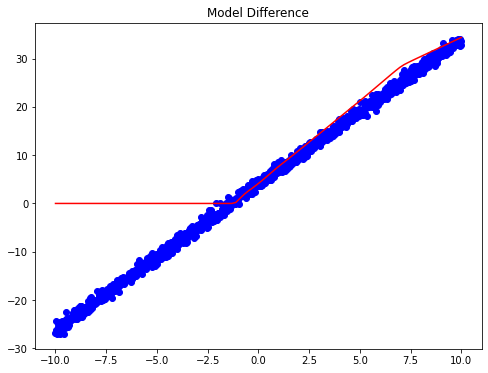

In [19]:
# Show the model results
model.eval()
with torch.no_grad():
    x_full = torch.linspace(-10, 10, 100).view(-1, 1)
    y_pred = model(x_full)
plt.figure(figsize=(8, 6))
plt.scatter(dataset.x.numpy(), dataset.y.numpy(), color="blue")
plt.plot(x_full.numpy(), y_pred.numpy(), color="red")
plt.title("Model Difference")
plt.show()

In the following above example, we try to train a model on a dataset with samples that are defined via $f(x) = 3x + 4$. Here, we can the data points from the dataset plot in blue points. The data here is along $f$, but some variances are implemented to make the learning process difficult. In the red line, you can see the model's prediction along the $x$ axis. Here, you can see the ReLU function forming because of the activation functions that the model uses and the simplicity as shown in the model output below.

In [20]:
print(model)

TheModel(
  (linear1): Linear(in_features=1, out_features=512, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)
